<a href="https://colab.research.google.com/github/batra-ayush/PyTorch-Examples/blob/main/MNIST_with_Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [ ]:
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'), delimiter=',')

In [ ]:
data

array([[6., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [ ]:
labels = data[:,0]
data = data[:,1:]
data.shape
labels

array([6., 5., 7., ..., 2., 9., 5.])

In [ ]:
print(data.shape)
print(labels.shape)

(20000, 784)
(20000,)


In [ ]:
dataNorm = data/np.max(data)

In [ ]:
dataT = torch.tensor(dataNorm).float()
labelsT = torch.tensor(labels).long()

train_data, test_data, train_labels, test_labels = train_test_split(dataT,labelsT,test_size=0.2)

train_data = TensorDataset(train_data,train_labels)
test_data = TensorDataset(test_data,test_labels)



In [ ]:
train_loader = DataLoader(train_data,batch_size=8,shuffle=True,drop_last=True)
test_loader = DataLoader(test_data,batch_size=128)

In [ ]:
train_loader

In [ ]:
# check all variables
%whos

Variable           Type             Data/Info
---------------------------------------------
DataLoader         type             <class 'torch.utils.data.dataloader.DataLoader'>
F                  module           <module 'torch.nn.functio<...>/torch/nn/functional.py'>
TensorDataset      type             <class 'torch.utils.data.dataset.TensorDataset'>
data               ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
dataNorm           ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
dataT              Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
display            module           <module 'IPython.display'<...>ages/IPython/display.py'>
labels             ndarray          20000: 20000 elems, type `float64`, 160000 bytes (156.25 kb)
labelsT            Tensor           tensor([6, 5, 7,  ..., 2, 9, 5])
nn                 module           <module 'torch.nn' from '<...>es/t

In [ ]:
def createTheMNISNet(optimizerAlgo,learningrate):
  class mnisNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.input = nn.Linear(784,64)
      self.hidden1 = nn.Linear(64,32)
      self.hidden2 = nn.Linear(32,32)
      self.output = nn.Linear(32,10)

    def forward(self,x):
      x = self.input(x)
      x = F.relu(x)
      x = self.hidden1(x)
      x = F.relu(x)
      x = self.hidden2(x)
      x = F.relu(x)
      x = self.output(x)
      return torch.log_softmax(x,axis=1) # we are using log_softmax, because I am using NLLLoss instead of CrossEntropy

  net = mnisNet()
  lossfun = nn.NLLLoss()

  optifun = getattr(torch.optim,optimizerAlgo)
  optimizer = optifun(net.parameters(),lr=learningrate)

  return net,lossfun,optimizer



In [ ]:

def function2TrainTheModel(optimizerAlgo,learningrate):
  trainacc = []
  numepochs = 60
  net,lossfun,optimizer = createTheMNISNet(optimizerAlgo,learningrate)
  lossperepoch = []

  for epochi in range(numepochs):
    batchacc = []
    batch_acc = []
    batchloss = []

    for X,y in train_loader:

      yHat = net(X)
      loss = lossfun(yHat,y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchacc = 100*torch.mean((torch.argmax(yHat,axis=1) == y).float())
      batch_acc.append(batchacc.item())
      batchloss.append(torch.mean(loss).item())
    trainacc.append(np.mean(batch_acc))
    lossperepoch.append(np.mean(batchloss))


    finalacc = []
    testacc = []
    XX,YY = next(iter(test_loader))
    yPred = net(XX)
    testacc = (100*torch.mean((torch.argmax(yPred,axis=1) == YY).float())).item()

  return trainacc,testacc,lossperepoch

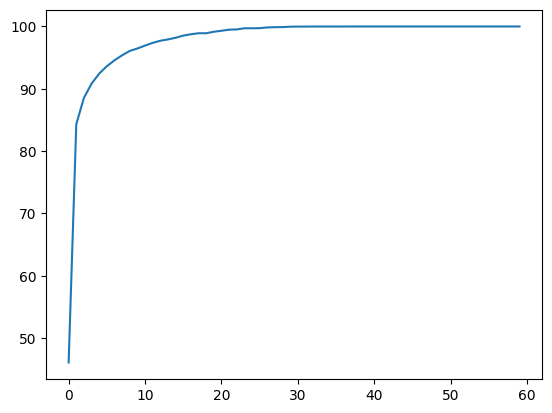

In [ ]:
trainacc,testacc,loss = function2TrainTheModel('SGD',0.01)
plt.plot(trainacc)

SGD
RMSprop
Adam


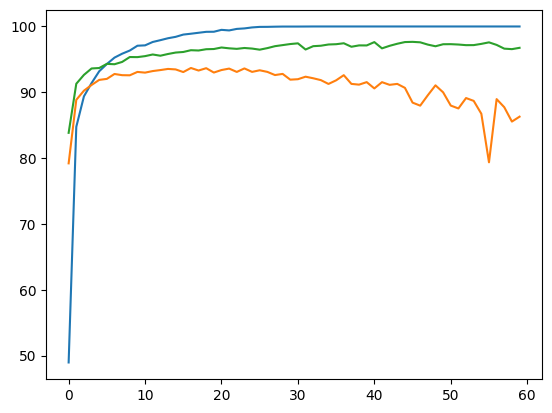

In [ ]:
learningRates = 0.01
optimTypes = ['SGD','RMSprop','Adam']
for count,opto in enumerate(optimTypes):
  print(opto)
  trainacc,testacc,loss = function2TrainTheModel(opto,learningRates)
 # plt.plot(loss)
  plt.plot(trainacc)